In [ ]:
import numpy as np
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy,verbose=0):
	epochs, batch_size = 50, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	history = model.fit(trainX, trainy,validation_split = 0.1, callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ],epochs=epochs, batch_size=batch_size,verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size)
	return accuracy,history,model

In [ ]:
body_acc_x_train = load_file('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt')
body_acc_y_train = load_file('UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt')
body_acc_z_train = load_file('UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt')
body_gyro_x_train = load_file('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt')
body_gyro_y_train = load_file('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt')
body_gyro_z_train = load_file('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt')
total_acc_x_train = load_file('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt')
total_acc_y_train = load_file('UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt')
total_acc_z_train = load_file('UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt')


In [ ]:
body_acc_x_train.shape

(7352, 128)

In [ ]:
trainX = dstack((body_acc_x_train,body_acc_y_train,body_acc_z_train,body_gyro_x_train,body_gyro_y_train,body_gyro_z_train,total_acc_x_train,total_acc_y_train,total_acc_z_train))
trainy = load_file('UCI HAR Dataset/train/y_train.txt')

In [ ]:
body_acc_x_test = load_file('UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt')
body_acc_y_test = load_file('UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt')
body_acc_z_test = load_file('UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt')
body_gyro_x_test = load_file('UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt')
body_gyro_y_test = load_file('UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt')
body_gyro_z_test = load_file('UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt')
total_acc_x_test = load_file('UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt')
total_acc_y_test = load_file('UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt')
total_acc_z_test = load_file('UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt')

In [ ]:
testX = dstack((body_acc_x_test,body_acc_y_test,body_acc_z_test,body_gyro_x_test,body_gyro_y_test,body_gyro_z_test,total_acc_x_test,total_acc_y_test,total_acc_z_test))
testy = load_file('UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt')

In [ ]:
trainX.shape,trainy.shape,testX.shape,testy.shape

((7352, 128, 9), (7352, 1), (2947, 128, 9), (2947, 1))

In [ ]:
trainy = trainy - 1
testy = testy - 1

trainy = to_categorical(trainy)
testy = to_categorical(testy)
print(trainy.shape,testy.shape)

(7352, 6) (2947, 6)


In [ ]:
testy.shape


(2947, 6)

In [ ]:
accuracy,history,model = evaluate_model(trainX, trainy, testX, testy,verbose=1)

Epoch 1/50
104/104 [==============================] - 19s 162ms/step - loss: 1.2277 - accuracy: 0.4807 - val_loss: 0.7871 - val_accuracy: 0.6970
Epoch 2/50
104/104 [==============================] - 17s 162ms/step - loss: 0.8364 - accuracy: 0.6459 - val_loss: 0.6477 - val_accuracy: 0.6821
Epoch 3/50
104/104 [==============================] - 17s 164ms/step - loss: 0.6106 - accuracy: 0.7399 - val_loss: 0.4856 - val_accuracy: 0.7908
Epoch 4/50
104/104 [==============================] - 18s 171ms/step - loss: 0.4617 - accuracy: 0.8232 - val_loss: 0.4184 - val_accuracy: 0.8274
Epoch 5/50
104/104 [==============================] - 18s 171ms/step - loss: 0.3468 - accuracy: 0.8788 - val_loss: 0.2371 - val_accuracy: 0.9226
Epoch 6/50
104/104 [==============================] - 18s 172ms/step - loss: 0.2349 - accuracy: 0.9247 - val_loss: 0.2427 - val_accuracy: 0.9090
Epoch 7/50
104/104 [==============================] - 18s 172ms/step - loss: 0.2133 - accuracy: 0.9318 - val_loss: 0.2094 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 54,706
Trainable params: 54,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
accuracy

0.885646402835846

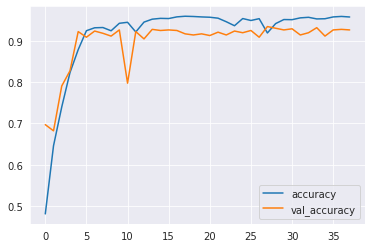

In [ ]:
sns.set_style('darkgrid')
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

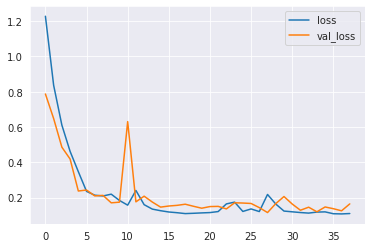

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predicty=list(map(lambda x: np.argmax(x)*[0]+[1]+(5-np.argmax(x))*[0],model.predict(testX,verbose=True)))
print(predicty[1],testy[1])
rmse = mean_squared_error(testy, predicty)
r2 = r2_score(testy, predicty)

print("MSE:", rmse)
print("R2 score:",r2)

93/93 [==============================] - 3s 28ms/step
[0, 0, 0, 0, 1, 0] [0. 0. 0. 0. 1. 0.]
MSE: 0.03811785997059156
R2 score: 0.7284346536007774
